In [6]:
!pip install yfinance

Error processing line 1 of C:\Users\icom1\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib-3.5.3-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\icom1\AppData\Local\Programs\Python\Python310\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing line 1 of C:\Users\icom1\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib-3.6.0-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\icom1\AppData\Local\Programs\Python\Python310\lib\site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored

[notice] 

Получение котировок акций
---

[*********************100%***********************]  1 of 1 completed


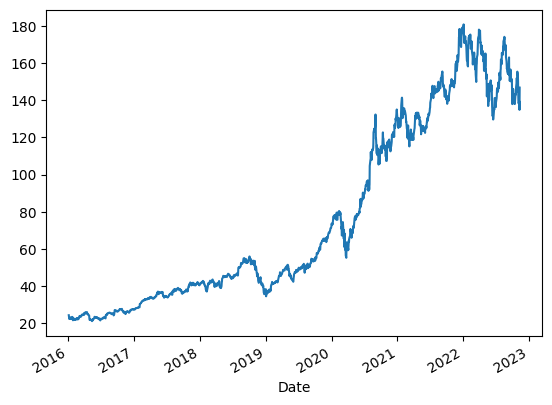

In [7]:
import yfinance as yf

# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2022-11-11')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()


In [8]:
# Define the ticker list
import pandas as pd
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Import pandas
data = pd.DataFrame(columns=tickers_list)

# Fetch the data

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2016-01-01','2022-11-11')['Adj Close']

# Print first 5 rows of the data
data.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,WMT,IBM,MU,BA,AXP
Date,,,,,,
2016-01-04,24.111494,53.333473,94.837860,14.217355,126.005112,60.768017
2016-01-05,23.507278,54.600422,94.768097,14.703504,126.516312,59.832989
2016-01-06,23.047251,55.147129,94.293716,14.108221,124.507401,58.171459
2016-01-07,22.074549,56.431431,92.682266,13.552622,119.287827,57.647724
2016-01-08,22.191277,55.138432,91.824242,13.225215,116.579376,57.458092


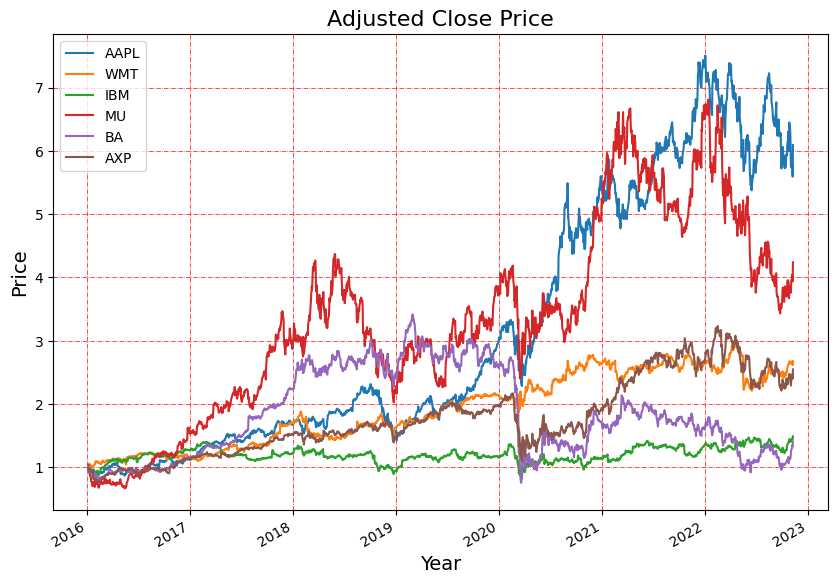

In [40]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='r', linestyle='-.', linewidth=0.5)
plt.show()


Общий финансовый анализ часть 1
---

In [28]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

sber = yf.download('SBER.ME','2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [29]:
# Скорректированая цена закрытия`
daily_close = sber[['Adj Close']]

# Дневная доходность
daily_pct_change = daily_close.pct_change()

# Заменить NA значения на 0
daily_pct_change.fillna(0, inplace=True)

print(daily_pct_change.head())

# Дневная лог доходность
daily_log_returns = np.log(daily_close.pct_change()+1)

print(daily_log_returns.head())


            Adj Close
Date                 
2021-01-04   0.000000
2021-01-05  -0.004223
2021-01-06   0.001499
2021-01-08   0.000000
2021-01-11   0.053371
            Adj Close
Date                 
2021-01-04        NaN
2021-01-05  -0.004232
2021-01-06   0.001498
2021-01-08   0.000000
2021-01-11   0.051996


In [30]:
# Взять у `sber` значения за последний рабочий день месяца
monthly = sber.resample('BM').apply(lambda x: x[-1])

# Месячная доходность
print(monthly.pct_change().tail())

# Пересчитать `sber` по кварталам и взять среднее значение за квартал
quarter = sber.resample("4M").mean()

# Квартальную доходность
print(quarter.pct_change().tail())


                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2022-01-31 -0.122331 -0.126917 -0.117453 -0.123377  -0.123377 -1.000000
2022-02-28 -0.519007 -0.405745 -0.552589 -0.492771  -0.492771       inf
2022-03-31  0.092929 -0.035843  0.168621  0.101073   0.101073 -0.701164
2022-04-29 -0.085619 -0.118106 -0.087125 -0.103626  -0.103626 -0.262266
2022-05-31  0.015606 -0.033846  0.022801 -0.024845  -0.024845 -1.000000
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2021-01-31       NaN       NaN       NaN       NaN        NaN       NaN
2021-05-31  0.040195  0.038060  0.046736  0.047148   0.059617 -0.212685
2021-09-30  0.101638  0.099245  0.104338  0.101912   0.156688 -0.429262
2022-01-31  0.010322  0.016919 -0.002536  0.004902   0.004902  1.913958
2022-05-31 -0.477040 -0.468566 -0.490713 -0.482586  -0.482586  0

In [31]:
# Дневная доходность
daily_pct_change = daily_close / daily_close.shift(1) - 1

print(daily_pct_change.head())


            Adj Close
Date                 
2021-01-04        NaN
2021-01-05  -0.004223
2021-01-06   0.001499
2021-01-08   0.000000
2021-01-11   0.053371


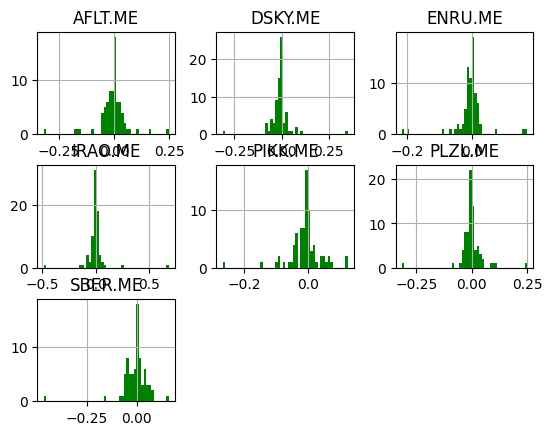

         AFLT.ME    DSKY.ME    ENRU.ME    IRAO.ME    PIKK.ME    PLZL.ME  \
count  77.000000  77.000000  77.000000  77.000000  77.000000  77.000000   
mean   -0.006901  -0.005142  -0.006564  -0.000107  -0.007675   0.001043   
std     0.067167   0.062843   0.047315   0.107259   0.051921   0.055028   
min    -0.318367  -0.312391  -0.216316  -0.487897  -0.268180  -0.315727   
25%    -0.025000  -0.020186  -0.015417  -0.019128  -0.021043  -0.014388   
50%     0.000000  -0.004966  -0.003038   0.000000   0.000000   0.000000   
75%     0.013238   0.004324   0.005485   0.012346   0.007517   0.011080   
max     0.247176   0.353146   0.167435   0.683900   0.127685   0.249888   

         SBER.ME  
count  77.000000  
mean   -0.008303  
std     0.069680  
min    -0.466825  
25%    -0.034792  
50%     0.000000  
75%     0.016917  
max     0.160000  


In [41]:
# Диаграмма `daily_pct_c`
daily_pct_change.hist(bins=50, color = 'g')

plt.show()

# Общая статистика
print(daily_pct_change.describe())


In [33]:
# Кумулютивная дневная доходность
cum_daily_return = (1 + daily_pct_change).cumprod()

print(cum_daily_return.tail())


            Adj Close
Date                 
2022-05-18   0.483849
2022-05-19   0.485705
2022-05-20   0.485705
2022-05-23   0.485705
2022-05-24   0.485705


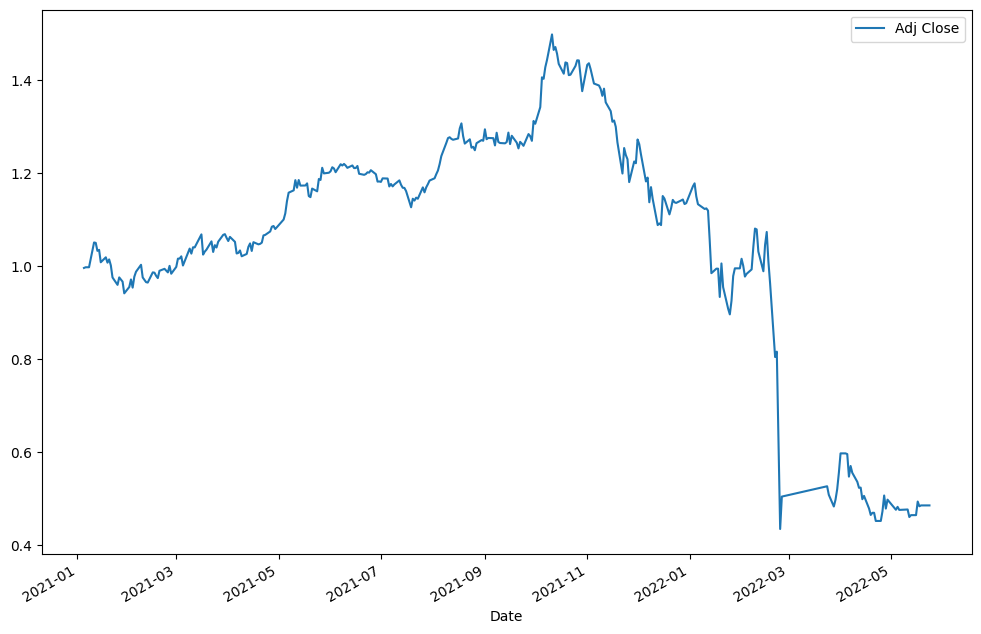

In [34]:
# Построение кумулятивной дневной доходности
cum_daily_return.plot(figsize=(12,8))

plt.show()


In [35]:
# Месячная кумулятивная доходность
cum_monthly_return = cum_daily_return.resample("M").mean()

print(cum_monthly_return.tail())


            Adj Close
Date                 
2022-01-31   1.030768
2022-02-28   0.935446
2022-03-31   0.515481
2022-04-30   0.514253
2022-05-31   0.478703


[*********************100%***********************]  7 of 7 completed


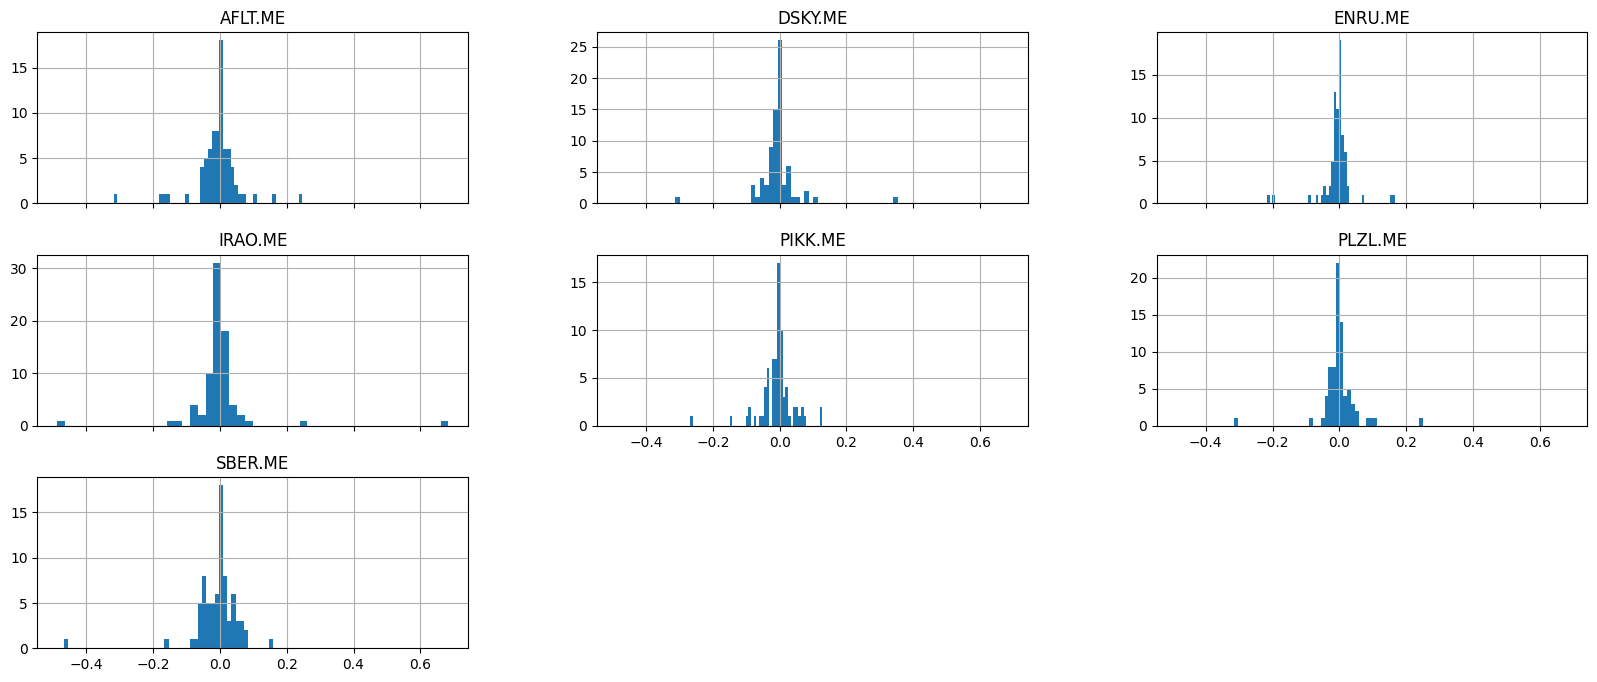

In [38]:
ticker = ['AFLT.ME','DSKY.ME','IRAO.ME','PIKK.ME', 'PLZL.ME','SBER.ME','ENRU.ME']

stock = yf.download(ticker,'2022-01-01')

# Дневная доходность в `daily_close_px`
daily_pct_change = stock['Adj Close'].pct_change()

# Распределение
daily_pct_change.hist(bins=50, sharex=True, figsize=(20,8))

plt.show()


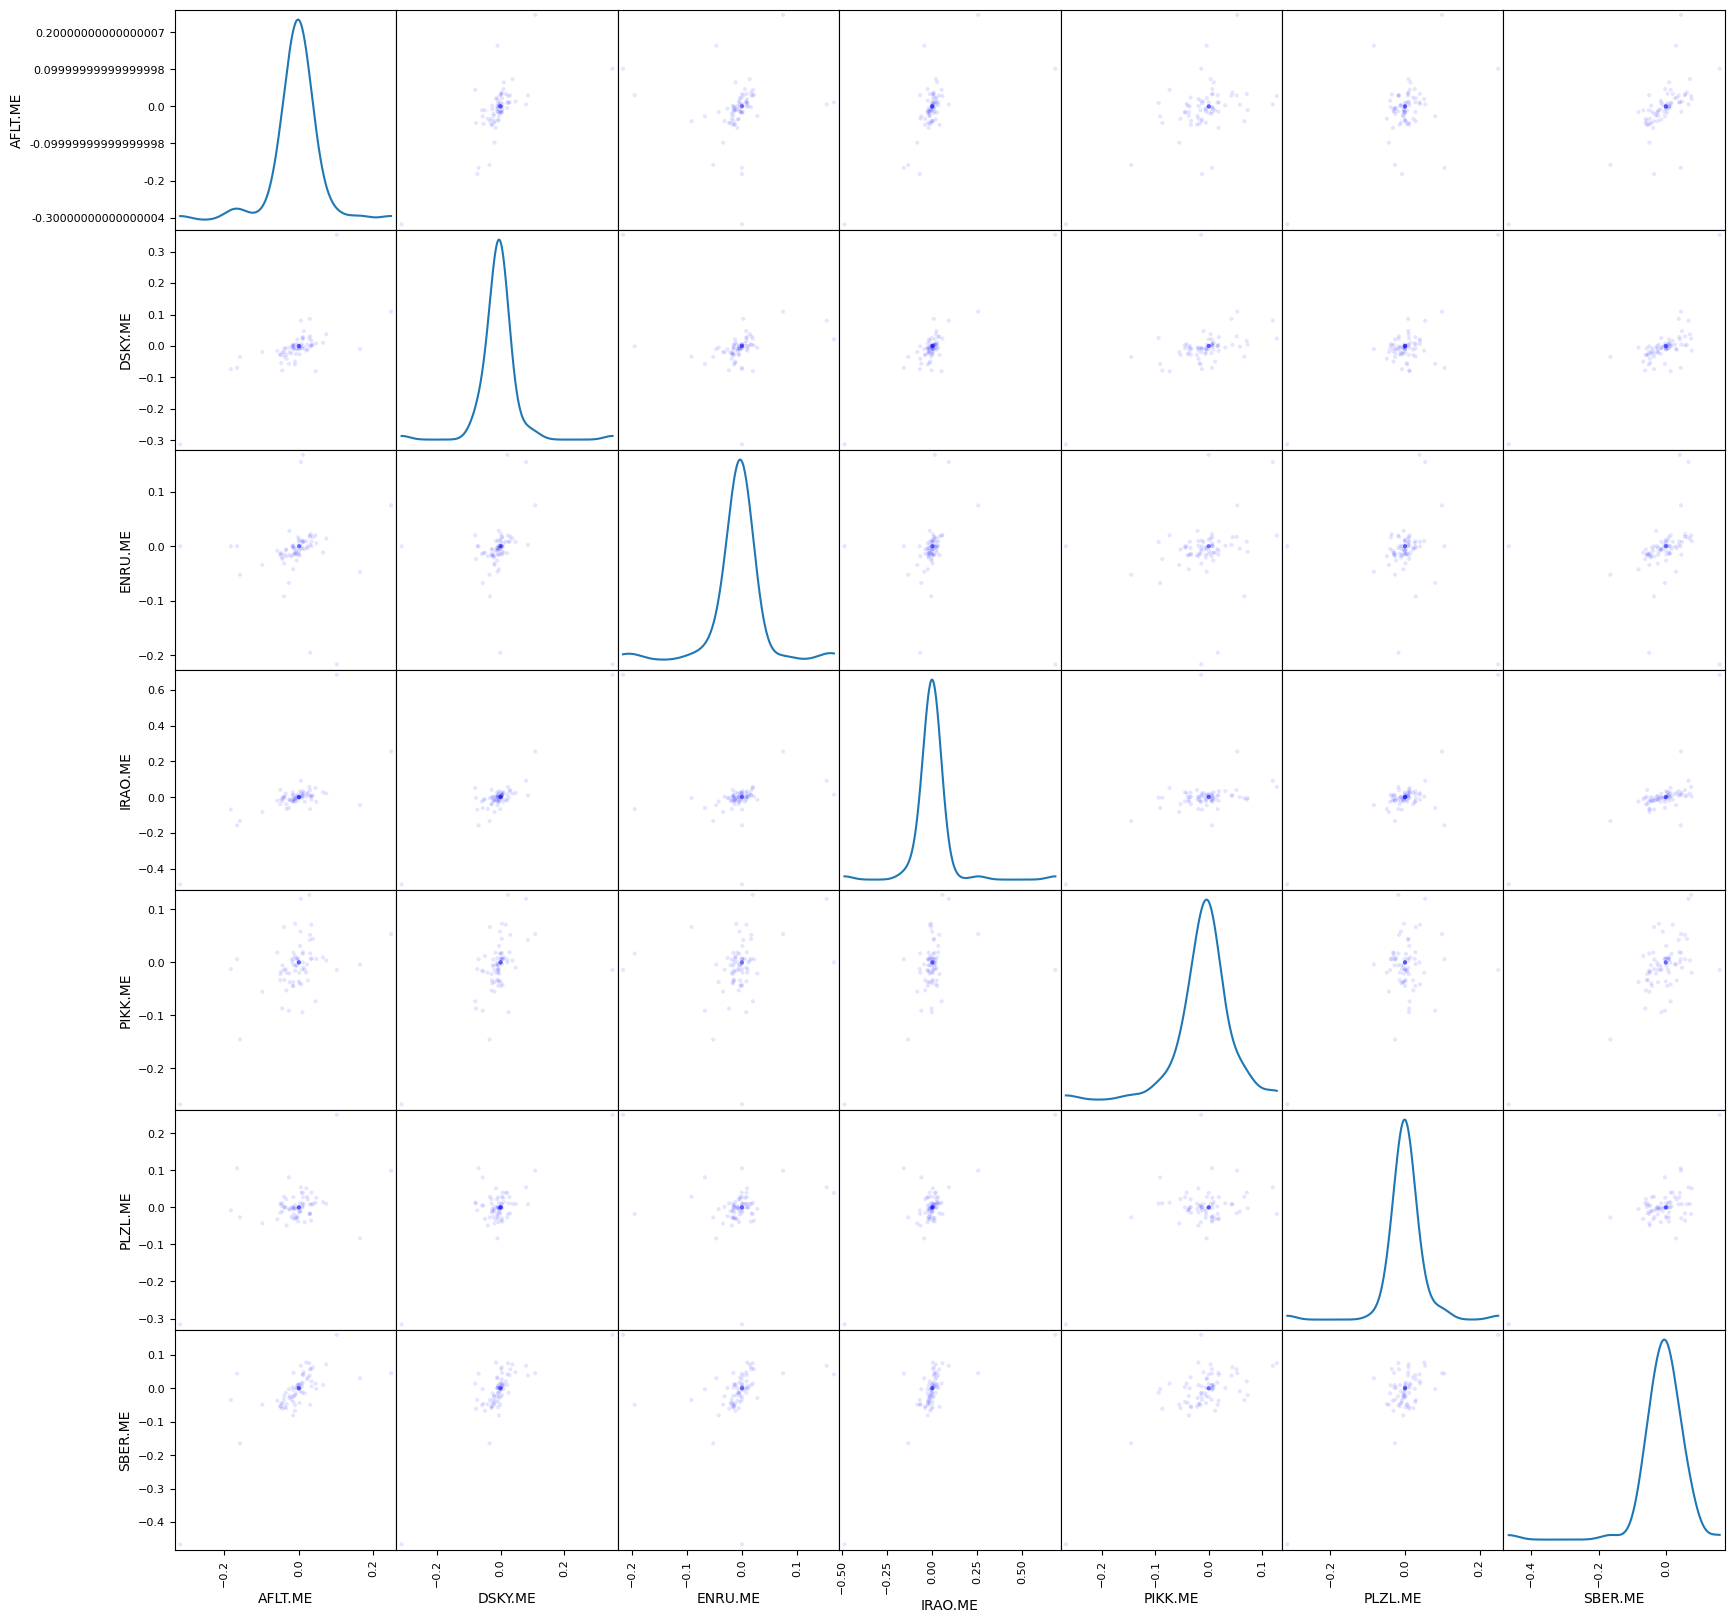

In [42]:
from pandas.plotting import scatter_matrix

# Матрица рассеивания `daily_pct_change`  
scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(20,20), color = 'b')

plt.show()


Общий финансовый анализ часть 2
---

In [21]:
# Выделяю скорректированную цену закрытия
adj_close_px = sber['Adj Close']

# Вычисляю скользящую среднию
moving_avg = adj_close_px.rolling(window=40).mean()

# Вывожу результат
print(moving_avg[-10:])


Date
2022-05-11    151.557250
2022-05-12    148.144250
2022-05-13    144.394001
2022-05-16    140.461751
2022-05-17    137.129251
2022-05-18    134.032251
2022-05-19    131.972251
2022-05-20    129.837251
2022-05-23    130.164751
2022-05-24    130.042251
Name: Adj Close, dtype: float64


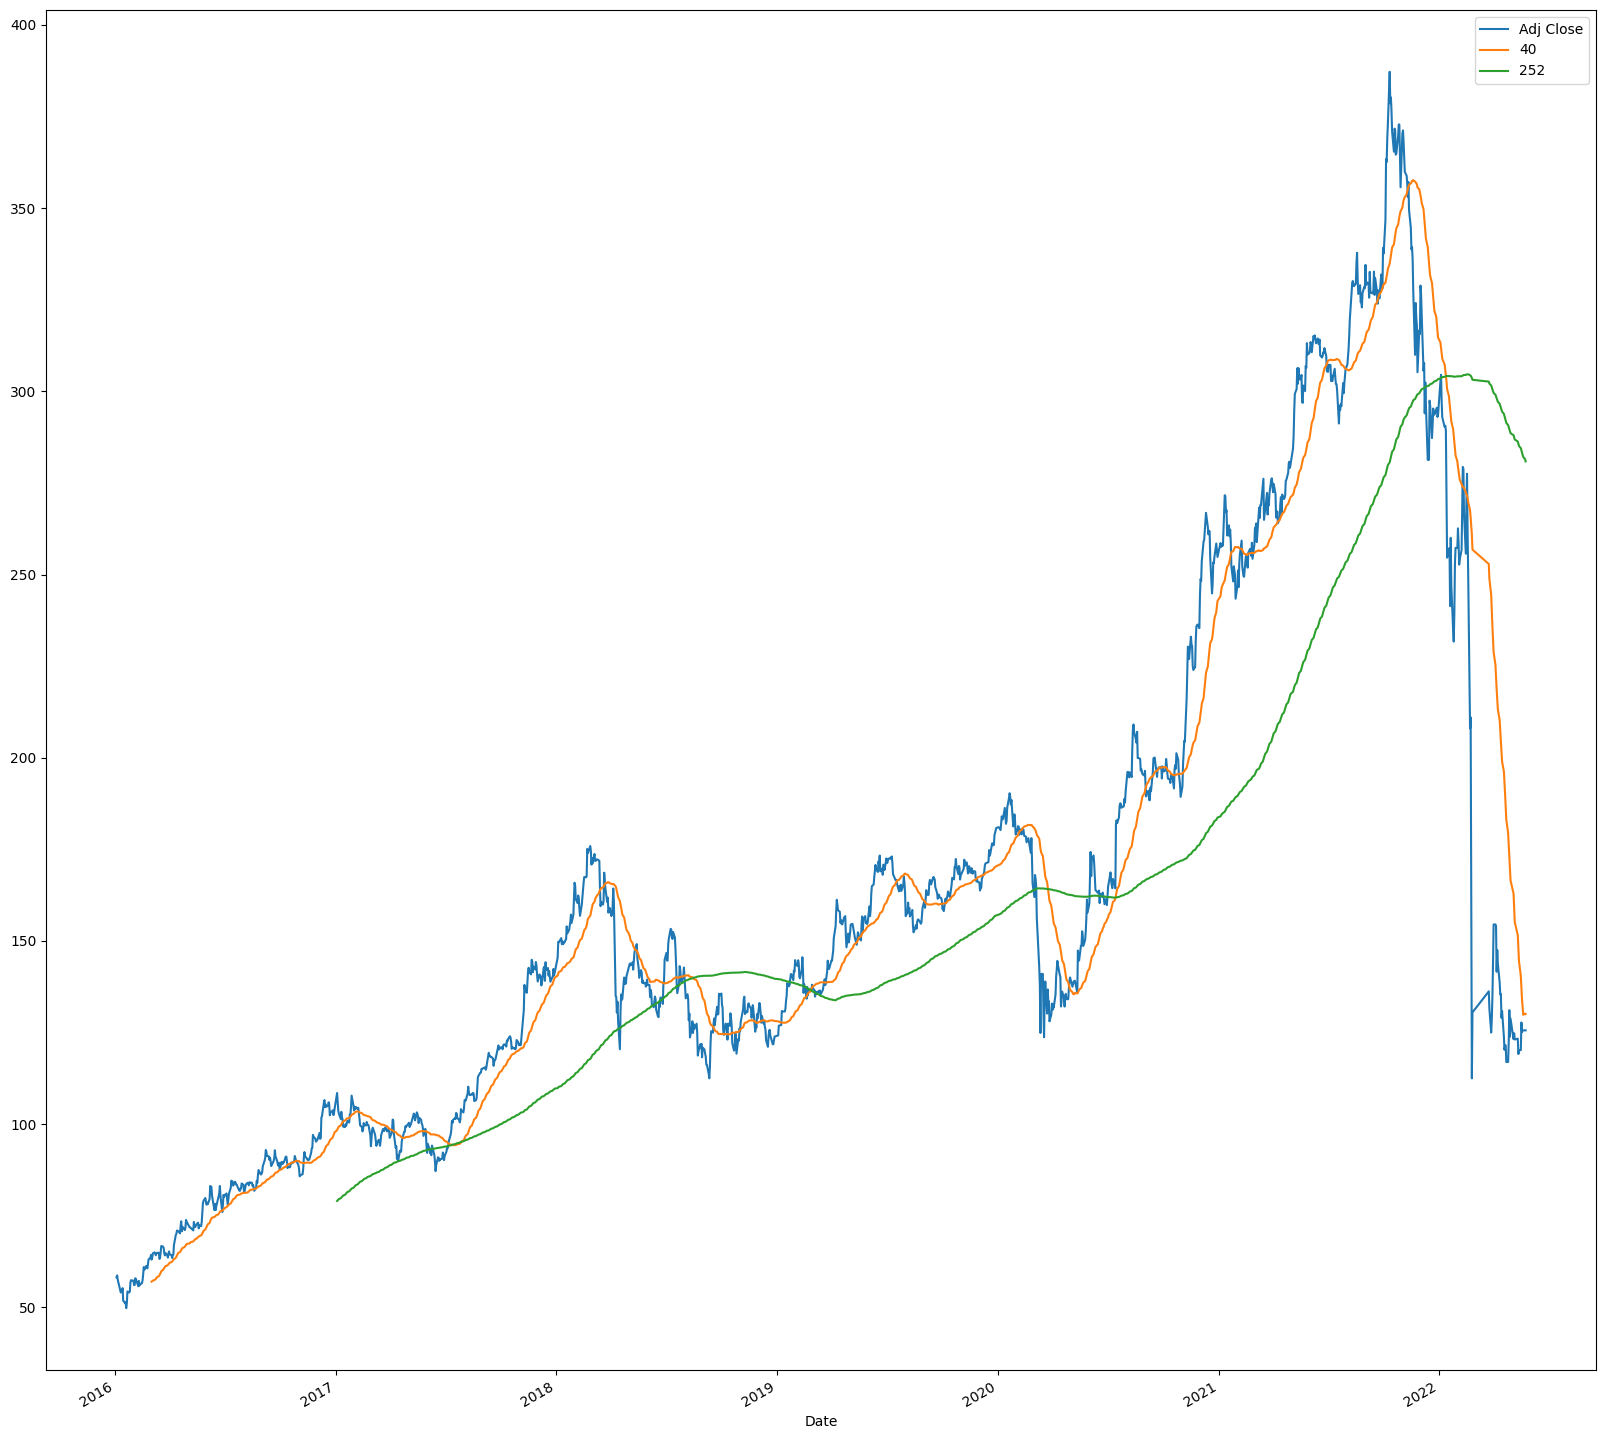

In [22]:
# Вычисление короткой скользящей средней
sber['40'] = adj_close_px.rolling(window=40).mean()

# Вычисление длинной скользящей средней
sber['252'] = adj_close_px.rolling(window=252).mean()

# Построение полученных значений
sber[['Adj Close', '40', '252']].plot(figsize=(20,20))

plt.show()


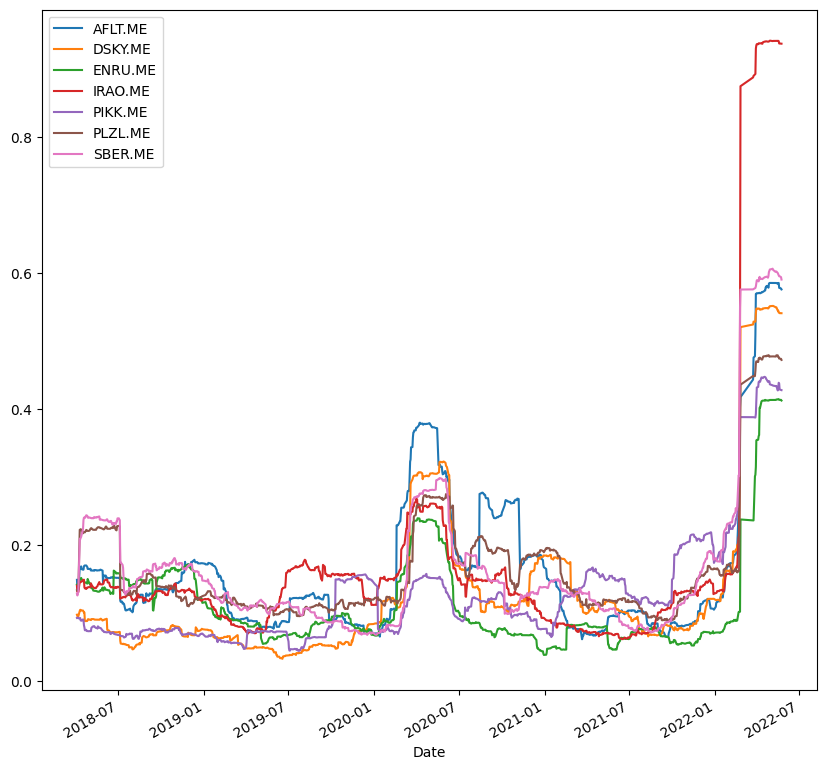

In [27]:
# Определяю рассматриваемый период
min_periods = 60

# Вычисляю волатильность
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)

# Строю график
vol.plot(figsize=(10, 10))

plt.show()


Общий финансовый анализ часть 3
---

In [24]:
#Загружаем библиотеки
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Загружаю данные
ticker = ['AFLT.ME','IMOEX.ME']
stock = yf.download(ticker)

# Выделение скорректированой цены закрытия
all_adj_close = stock[['Adj Close']]

# Вычисление доходности
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Выделение доходности по акциям  
aflt_returns = all_returns['Adj Close'][['AFLT.ME']].fillna(0)

# Выделение доходности по индексу МосБиржи
moex_returns = all_returns['Adj Close'][['IMOEX.ME']].fillna(0)


# Создание нового DataFrame

return_data = pd.concat([aflt_returns, moex_returns], axis=1)[1:]
return_data.columns = ['AFLT.ME', 'IMOEX.ME']


# Добавляем столбец единиц и определяем X и y
X = sm.add_constant(return_data['IMOEX.ME'])
y = return_data['AFLT.ME']


# Создание модели
model_moex = sm.OLS(y,X).fit()

# Вывод результатов
print(model_moex.summary())


[*********************100%***********************]  2 of 2 completed
                            OLS Regression Results                            
Dep. Variable:                AFLT.ME   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     807.1
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          2.56e-158
Time:                        15:58:59   Log-Likelihood:                 7734.7
No. Observations:                3162   AIC:                        -1.547e+04
Df Residuals:                    3160   BIC:                        -1.545e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [25]:
sp_500 = yf.download('^GSPC')
fb = yf.download('META')

# Пересчет в месячную доходность
fb = fb.resample('BM').apply(lambda x: x[-1])
sp_500 = sp_500.resample('BM').apply(lambda x: x[-1])

monthly_prices = pd.concat([fb['Close'], sp_500['Close']], axis=1)
monthly_prices.columns = ['FB', '^GSPC']

monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  

X = clean_monthly_returns['^GSPC']
y = clean_monthly_returns['FB']

X1 = sm.add_constant(X)

model_fb_sp_500 = sm.OLS(y, X1)

results_fb_sp_500 = model_fb_sp_500.fit()
print(results_fb_sp_500.summary())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:                     FB   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     23.43
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           3.78e-06
Time:                        16:00:43   Log-Likelihood:                 110.44
No. Observations:                 126   AIC:                            -216.9
Df Residuals:                     124   BIC:                            -211.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

In [26]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(slope)


1.0683501010535628
